[View in Colaboratory](https://colab.research.google.com/github/jesandovala/Project-Final-Classification-Images/blob/master/MOVIES_FPROJECT_V2.ipynb)

####Created by Aleksey Sepúlveda Durán & Jose Eduardo Sandoval Alba

In [1]:
from keras import backend as K
K.clear_session()

Using TensorFlow backend.


### Import Modules

In [2]:

!pip install tqdm
!pip install livelossplot
!pip install -U -q PyDrive
!pip install pprint

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import keras.optimizers as krsopt

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tqdm import tqdm
from zipfile import *
from livelossplot import PlotLossesKeras
from pprint import pprint



%matplotlib inline

In [3]:
dataTesting = pd.read_csv(os.path.join('https://github.com/jesandovala/Project-Final-Classification-Images/raw/master/dataTesting.csv'), encoding='UTF-8', index_col=0)
dataTraining = pd.read_csv(os.path.join('https://github.com/jesandovala/Project-Final-Classification-Images/raw/master/dataTraining.csv'), encoding='UTF-8', index_col=0)

dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [0]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1cFX4osUZTu-SSa8gHh8kRA00L3eQwWnI'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])

In [6]:
!unzip images_resize_gray.zip> /dev/null

replace images_resize_gray/0_resize_gray.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [9]:
!ls

datalab  images_resize_gray  images_resize_gray.zip


In [0]:
from skimage import io
image = io.imread(os.path.join( 'images_resize_gray', str(dataTraining.index[110]) + '_resize_gray.jpeg'))

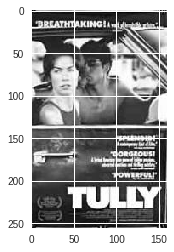

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')

In [16]:

images_training = []
for i in tqdm(dataTraining.index):
    images_training.append(io.imread(os.path.join('images_resize_gray', str(i) + '_resize_gray.jpeg')))



100%|██████████| 7895/7895 [00:04<00:00, 1595.57it/s]


In [17]:
images_training = np.stack(images_training)

images_training.shape, dataTraining.shape[0]

((7895, 256, 160), 7895)

In [18]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join( 'images_resize_gray', str(i) + '_resize_gray.jpeg')))

images_testing = np.stack(images_testing)

images_testing.shape, dataTesting.shape[0]

100%|██████████| 3383/3383 [00:02<00:00, 1582.97it/s]


((3383, 256, 160), 3383)

In [0]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [0]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(images_training, y_genres, test_size=0.3, random_state=110)

In [21]:
X_test.shape

(2369, 256, 160)

In [22]:
y_test_genres.shape

(2369, 24)

# CNN

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv1D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator


outputClasses = 24

model = Sequential()
model.add(Conv1D(32,32, input_shape=(256,160)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv1D(32, 32))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv1D(64,32))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv1D(64,32))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(outputClasses))

model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 225, 32)           163872    
_________________________________________________________________
batch_normalization_1 (Batch (None, 225, 32)           128       
_________________________________________________________________
activation_1 (Activation)    (None, 225, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 194, 32)           32800     
_________________________________________________________________
batch_normalization_2 (Batch (None, 194, 32)           128       
_________________________________________________________________
activation_2 (Activation)    (None, 194, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 163, 64)           65600     
__________

In [0]:
from keras.optimizers import adam
from keras.optimizers import SGD
from keras.optimizers import adamax
from keras.optimizers import RMSprop
from livelossplot import PlotLossesKeras

#Defines optimizer.
op = SGD(lr=0.0001)

# Compile the neural network.
model.compile(loss='categorical_crossentropy',
             optimizer=op,
              metrics=['accuracy'])

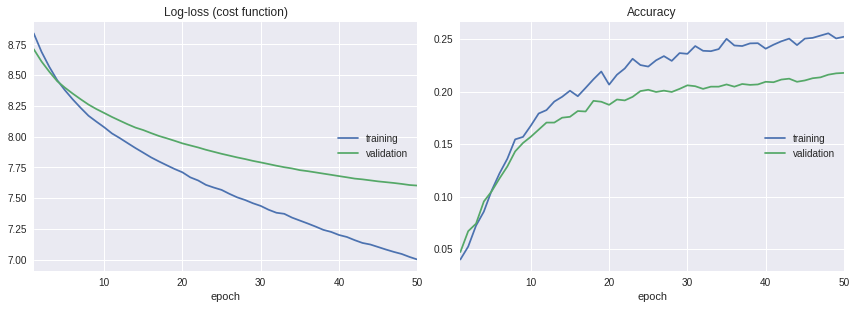

In [25]:
batch_size = 35
epochs = 50

trainingCNN = model.fit(X_train, y_train_genres,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    shuffle = False, 
                    validation_data = [X_test,y_test_genres],callbacks=[PlotLossesKeras()])

In [0]:
model1=model.predict(X_test)

In [0]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [0]:
auc = roc_auc_score(y_test_genres, model1, average="macro")

In [29]:
print(auc)

0.5468994700625172


#TRANSFER

In [110]:
from keras.applications import VGG16
from skimage.transform import resize

vgg16 = VGG16(include_top=False, weights='imagenet')

def apply_vgg_grayscale(images):

    images_ = []
    for img in tqdm(images):

        # reshape
        img = img.reshape((256, 160))

        # rescale
        img = resize(img, (160, 160), mode='reflect')

        # repeat
        img = [img] * 3

        images_.append(img)


    # To numpy array
    images_ = np.array(images_)

    # move channel to last axis
    images_ = np.rollaxis(images_, 1, 4)

    # Apply vgg
    images_vgg = vgg16.predict(images_)
    
    return images_vgg

images_training_vgg = apply_vgg_grayscale(images_training)
images_training_vgg.shape

images_testing_vgg = apply_vgg_grayscale(images_testing)
images_testing_vgg.shape

100%|██████████| 3383/3383 [00:09<00:00, 357.39it/s]


(3383, 5, 5, 512)

In [0]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(images_training_vgg, y_genres, test_size=0.3, random_state=110)

In [112]:
X_test.shape

(2369, 5, 5, 512)

In [115]:
from keras.optimizers import RMSprop
vgg16 = Sequential()
vgg16.add(Flatten(input_shape=(5,5,512)))
vgg16.add(Dense(512, activation='sigmoid'))
vgg16.add(Dropout(0.5))
vgg16.add(Dense(24, activation='sigmoid'))
vgg16.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0001), metrics=['accuracy'])
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               6554112   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 24)                12312     
Total params: 6,566,424
Trainable params: 6,566,424
Non-trainable params: 0
_________________________________________________________________


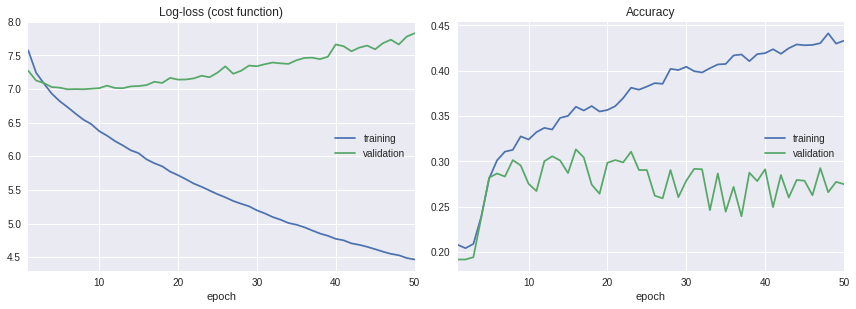

In [116]:
vgg16.fit(X_train, y_train_genres, validation_data=[X_test, y_test_genres], epochs=50, verbose=2, callbacks=[PlotLossesKeras()])

In [0]:
model2=vgg16.predict(X_test)

In [0]:
auc = roc_auc_score(y_test_genres, model2, average="macro")

In [119]:
print(auc)

0.692818092517841


In [0]:
from google.colab import files


cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = vgg16.predict(images_testing_vgg)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_img.csv', index_label='ID')

files.download('pred_genres_img.csv')

#  Text Classification

In [32]:
Xtraintext = dataTraining['plot']
Xtrainname = dataTraining['title']

Xtesttext = dataTesting['plot']
Xtestname = dataTesting['title']
Xtraintext.shape
dataTraining['genres'].shape

(7895,)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer(max_features=1000,ngram_range =(1,3),lowercase=True,stop_words='english')
X_dtm_text = vect.fit_transform(Xtraintext)
X_dtm_name = vect.fit_transform(Xtrainname)
Y_dtm_text = vect.fit_transform(Xtesttext)
Y_dtm_name = vect.fit_transform(Xtestname)

le = MultiLabelBinarizer()
y_genres_2 = le.fit_transform(dataTraining['genres'])

In [34]:
X_dtm_name.shape

(7895, 1000)

In [36]:
y_genres_2.shape

(7895, 24)

In [0]:
X_train_text, X_test_text, y_train_genres_text, y_test_genres_text = train_test_split(X_dtm_text, y_genres_2, test_size=0.3, random_state=110)
X_train_name, X_test_name, y_train_genres_name, y_test_genres_name = train_test_split(X_dtm_name, y_genres_2, test_size=0.3, random_state=110)

In [77]:
from keras.layers.recurrent import LSTM
model_text = Sequential()

model_text.add(Dense(128, input_shape=(1000,)))
model_text.add(Activation('tanh'))
model_text.add(BatchNormalization())
model_text.add(Dropout(0.5))

model_text.add(Dense(128))
model_text.add(Activation('softmax'))
model_text.add(BatchNormalization())
model_text.add(Dropout(0.5))

model_text.add(Dense(24))
model_text.add(Activation('sigmoid'))


model_text.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.0001), metrics=['accuracy'])
model_text.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 128)               128128    
_________________________________________________________________
activation_38 (Activation)   (None, 128)               0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 128)               512       
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_39 (Activation)   (None, 128)               0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 128)               512       
__________

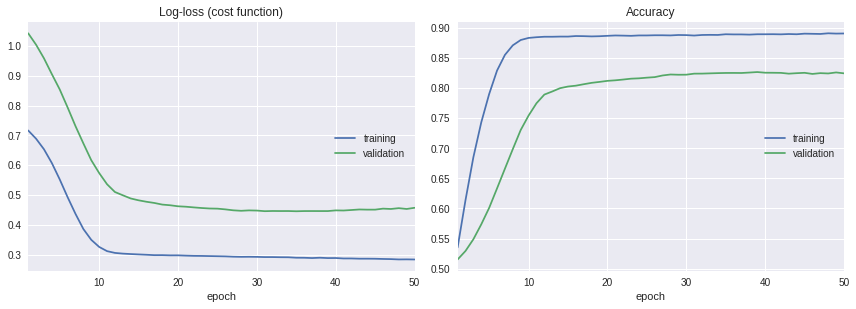

In [78]:
model_text.fit(X_train_name, y_train_genres_name, validation_data=[X_test_text, y_test_genres_text], epochs=50, verbose=2, callbacks=[PlotLossesKeras()])

In [0]:
model3=model_text.predict(X_test_name)

In [0]:
auc = roc_auc_score(y_test_genres_name, model3, average="macro")

In [81]:
print(auc)

0.5788659579393265


In [0]:
from google.colab import files


cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = model_text.predict(Y_dtm_name)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_img.csv', index_label='ID')

files.download('pred_genres_img.csv')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [144]:
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_url_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(24, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 128)          8832      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 29,473
Trainable params: 29,473
Non-trainable params: 0
_________________________________________________________________


# LSTM

In [0]:
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


In [0]:
X_train_text1, X_test_text1, y_train_genres_text1, y_test_genres_text1 = train_test_split(Xtraintext, y_genres_2, test_size=0.3, random_state=110)
X_train_name1, X_test_name1, y_train_genres_name1, y_test_genres_name1 = train_test_split(Xtrainname, y_genres_2, test_size=0.3, random_state=110)

In [89]:
max_review_length = 500
X_traintext = sequence.pad_sequences(X_train_text1, maxlen=max_review_length)
X_testtext = sequence.pad_sequences(X_test_text1, maxlen=max_review_length)
X_trainname = sequence.pad_sequences(X_train_name1, maxlen=max_review_length)
X_testname = sequence.pad_sequences(X_test_name1, maxlen=max_review_length)

ValueError: ignored

In [90]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
import keras
from keras import backend as K
print(K.tensorflow_backend._get_available_gpus())

['/job:localhost/replica:0/task:0/device:GPU:0']


In [0]:
X = dataTraining['plot'].tolist()

In [0]:
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}

In [0]:
# Max len
max_plot_len = 150
X = [x[:max_plot_len] for x in X]
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [95]:
len(X)

7895

In [0]:
X_pad = sequence.pad_sequences(X, maxlen=max_plot_len)

In [97]:
  X_pad

array([[33, 13, 49, ..., 61, 61, 27],
       [ 0,  0,  0, ..., 15, 61, 74],
       [36, 17, 61, ..., 36,  5, 61],
       ...,
       [ 5, 36, 15, ..., 36, 17, 30],
       [33, 11, 49, ..., 31, 40, 18],
       [ 0,  0,  0, ..., 18, 61, 74]], dtype=int32)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_genres_2, test_size=0.33, random_state=42)

In [102]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_plot_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(24, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 128)          9600      
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_21 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 24)                792       
Total params: 31,000
Trainable params: 31,000
Non-trainable params: 0
_________________________________________________________________


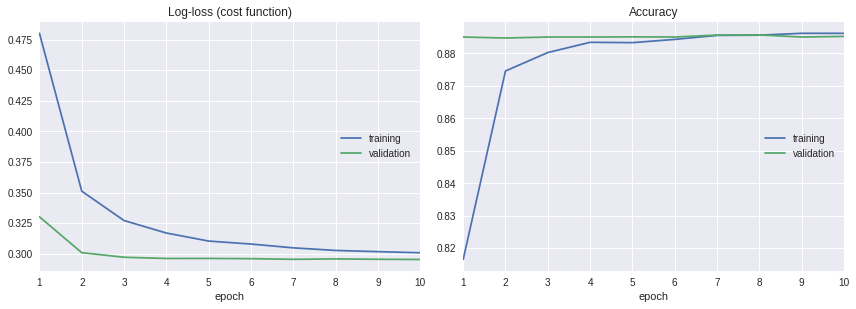

In [103]:
model.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [146]:
model.fit(X_train_text, y_train_genres_text, validation_data=[X_test_text, y_test_genres_text], 
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

ValueError: ignored

In [0]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import History
from livelossplot import PlotLossesKeras

In [125]:
Y=np_utils.to_categorical(ytrain,3)

ValueError: ignored

In [0]:
model = Sequential()

model.add(Dense(128, input_shape=(15051,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()